# 6.2 Exploring Relationships: Airbnb Mallorca

## Table of Contents
### 1. Importing libraries and dataset
### 2. Creating subset for exploring relationships
### 3. Exploring relationships
- Correlation Matrix Heatmap 
- Scatterplot(s) of the strongest correlations
- Pair Plot
- Categorical Plot
### 4. Answering questions
### 5. Defining hypotheses

### 1. Importing libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.7.2'

In [3]:
# ensures displaying the charts in the notebook without calling them.

%matplotlib inline

In [4]:
# create path

path = r'C:\Users\svand\Documents\15-04-2024 Airbnb Mallorca'

In [5]:
# import Mallorca listings dataset

df_selected = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'listings_checked.csv'), index_col = False)

In [6]:
df_selected.head()

,Unnamed: 0,id,listing_url,name,picture_url,host_since,host_is_superhost,location,latitude,longitude,...,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,0,18184333,https://www.airbnb.com/rooms/18184333,Quinze Germans,https://a0.muscache.com/pictures/prohost-api/H...,2016-06-30,f,Andratx,39.543490,2.390930,...,2017-09-22,2023-10-05,4.56,4.44,4.72,4.78,4.78,4.94,4.28,0.23
1,1,664248507739787372,https://www.airbnb.com/rooms/664248507739787372,Villa Alcanada Mar,https://a0.muscache.com/pictures/prohost-api/H...,2022-05-05,f,Alcúdia,39.836700,3.151310,...,2023-05-12,2023-05-12,5.00,5.00,5.00,3.00,4.00,5.00,5.00,0.09
2,2,629002706694235276,https://www.airbnb.com/rooms/629002706694235276,"Villa Beach Alcudia, near the beach with jacuzzi",https://a0.muscache.com/pictures/miso/Hosting-...,2018-02-13,f,Alcúdia,39.824417,3.114876,...,2022-06-29,2023-08-13,5.00,5.00,5.00,4.90,4.90,5.00,5.00,0.47
3,3,1006393514540791109,https://www.airbnb.com/rooms/1006393514540791109,Habitación matrimonial con A/C,https://a0.muscache.com/pictures/miso/Hosting-...,2019-11-20,f,Palma de Mallorca,39.553815,2.692827,...,2024-01-06,2024-01-29,5.00,5.00,5.00,5.00,5.00,5.00,4.00,0.77
4,4,41395364,https://www.airbnb.com/rooms/41395364,SANTA CATALINA PENTHOUSE,https://a0.muscache.com/pictures/8bda3e0a-3dd7...,2014-06-19,f,Palma de Mallorca,39.571850,2.634970,...,2020-02-22,2024-02-20,4.62,4.63,4.45,4.85,4.75,4.77,4.50,1.21


In [7]:
# drop the unnamed column

df_selected.drop(df_selected.columns[df_selected.columns.str.contains('unnamed', case=False)], axis=1, inplace=True)

In [8]:
df_selected.head()

,id,listing_url,name,picture_url,host_since,host_is_superhost,location,latitude,longitude,property_type,...,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,18184333,https://www.airbnb.com/rooms/18184333,Quinze Germans,https://a0.muscache.com/pictures/prohost-api/H...,2016-06-30,f,Andratx,39.543490,2.390930,Entire home,...,2017-09-22,2023-10-05,4.56,4.44,4.72,4.78,4.78,4.94,4.28,0.23
1,664248507739787372,https://www.airbnb.com/rooms/664248507739787372,Villa Alcanada Mar,https://a0.muscache.com/pictures/prohost-api/H...,2022-05-05,f,Alcúdia,39.836700,3.151310,Entire villa,...,2023-05-12,2023-05-12,5.00,5.00,5.00,3.00,4.00,5.00,5.00,0.09
2,629002706694235276,https://www.airbnb.com/rooms/629002706694235276,"Villa Beach Alcudia, near the beach with jacuzzi",https://a0.muscache.com/pictures/miso/Hosting-...,2018-02-13,f,Alcúdia,39.824417,3.114876,Entire home,...,2022-06-29,2023-08-13,5.00,5.00,5.00,4.90,4.90,5.00,5.00,0.47
3,1006393514540791109,https://www.airbnb.com/rooms/1006393514540791109,Habitación matrimonial con A/C,https://a0.muscache.com/pictures/miso/Hosting-...,2019-11-20,f,Palma de Mallorca,39.553815,2.692827,Private room in rental unit,...,2024-01-06,2024-01-29,5.00,5.00,5.00,5.00,5.00,5.00,4.00,0.77
4,41395364,https://www.airbnb.com/rooms/41395364,SANTA CATALINA PENTHOUSE,https://a0.muscache.com/pictures/8bda3e0a-3dd7...,2014-06-19,f,Palma de Mallorca,39.571850,2.634970,Entire rental unit,...,2020-02-22,2024-02-20,4.62,4.63,4.45,4.85,4.75,4.77,4.50,1.21


In [9]:
# Creating a new column with prices without the dollar sign

df_selected['price_without_symbol'] = df_selected['price'].str.replace('$', '')

In [10]:
# Remove the commas from the prices

df_selected['price_without_symbol'] = df_selected['price_without_symbol'].str.replace(',', '')

In [11]:
df_selected['price_without_symbol'].value_counts(dropna = False)

price_without_symbol
100.00     198
150.00     180
120.00     172
130.00     163
200.00     144
          ... 
24.00        1
469.00       1
599.00       1
1336.00      1
840.00       1
Name: count, Length: 836, dtype: int64

In [12]:
# Converting 'price_without_symbol' column to numeric

df_selected['price_without_symbol'] = pd.to_numeric(df_selected['price_without_symbol'])

In [13]:
df_selected['price_without_symbol'].dtypes

dtype('float64')

In [14]:
# check descriptive analysis for price:

df_selected['price_without_symbol'].describe()

count    11977.000000
mean       236.768556
std        411.245719
min         10.000000
25%        110.000000
50%        166.000000
75%        257.000000
max      21000.000000
Name: price_without_symbol, dtype: float64

### 2. Creating subset for exploring relationships

In [15]:
#Avoiding the limit of columns python sets to view your dataframe:

pd.options.display.max_columns = None

In [16]:
# view column names to see which columns to add to the subset

df_selected.columns

Index(['id', 'listing_url', 'name', 'picture_url', 'host_since',
       'host_is_superhost', 'location', 'latitude', 'longitude',
       'property_type', 'nr_of_guests', 'bedrooms', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'nr_of_reviews_last12months',
       'nr_of_reviews_last30days', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month', 'price_without_symbol'],
      dtype='object')

In [17]:
# drop unnecessary columns for exploring relationships and create subset

sub_listings = df_selected[['nr_of_guests', 'bedrooms', 'price_without_symbol', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 
         'availability_90', 'availability_365', 'number_of_reviews', 'nr_of_reviews_last12months', 'nr_of_reviews_last30days', 'review_scores_rating', 
        'reviews_per_month', 'review_scores_location']]      


In [18]:
sub_listings

,nr_of_guests,bedrooms,price_without_symbol,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,nr_of_reviews_last12months,nr_of_reviews_last30days,review_scores_rating,reviews_per_month,review_scores_location
0,4,2.0,190.0,1,28,28,58,88,207,18,3,0,4.56,0.23,4.94
1,10,5.0,579.0,6,1125,1,6,6,45,1,1,0,5.00,0.09,5.00
2,8,3.0,450.0,6,365,9,32,53,309,10,4,0,5.00,0.47,5.00
3,2,1.0,52.0,3,6,30,60,63,69,2,2,0,5.00,0.77,5.00
4,3,1.0,67.0,30,730,0,26,36,266,60,14,0,4.62,1.21,4.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11972,2,1.0,91.0,3,365,12,26,54,318,17,6,0,4.82,0.77,4.53
11973,5,3.0,115.0,1,365,27,57,87,362,1,1,0,5.00,0.35,5.00
11974,6,3.0,164.0,1,1125,23,44,67,307,15,1,0,4.80,0.44,4.80
11975,4,2.0,75.0,7,300,5,18,32,197,17,8,0,4.94,0.35,4.94


### 3. Exploring relationships

### Correlation Matrix Heatmap

In [19]:
# Create a correlation matrix using pandas

sub_listings.corr()

,nr_of_guests,bedrooms,price_without_symbol,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,nr_of_reviews_last12months,nr_of_reviews_last30days,review_scores_rating,reviews_per_month,review_scores_location
nr_of_guests,1.000000,0.918403,0.314549,-0.041113,0.097135,0.024232,0.001767,-0.047208,-0.073082,-0.208751,-0.245533,-0.200686,0.027190,-0.295547,-0.045845
bedrooms,0.918403,1.000000,0.301954,-0.039687,0.085120,0.021809,0.003533,-0.042416,-0.068776,-0.209460,-0.252891,-0.203909,0.033816,-0.303140,-0.038399
price_without_symbol,0.314549,0.301954,1.000000,-0.014002,-0.010140,0.044638,0.044551,0.031702,0.023062,-0.100739,-0.112776,-0.087133,0.022034,-0.122723,0.012026
minimum_nights,-0.041113,-0.039687,-0.014002,1.000000,-0.090103,-0.033994,-0.034537,-0.030649,0.018445,0.010195,-0.040048,-0.031728,0.072834,-0.027397,0.063557
maximum_nights,0.097135,0.085120,-0.010140,-0.090103,1.000000,0.040572,0.030408,0.030719,0.077590,-0.005280,-0.054703,-0.050698,-0.025263,-0.108368,-0.007306
availability_30,0.024232,0.021809,0.044638,-0.033994,0.040572,1.000000,0.925950,0.856639,0.637831,-0.148813,-0.108831,-0.122332,-0.056626,-0.105500,-0.055341
availability_60,0.001767,0.003533,0.044551,-0.034537,0.030408,0.925950,1.000000,0.959214,0.692043,-0.152234,-0.107516,-0.121968,-0.070715,-0.098784,-0.063255
availability_90,-0.047208,-0.042416,0.031702,-0.030649,0.030719,0.856639,0.959214,1.000000,0.735445,-0.136064,-0.084204,-0.100789,-0.087159,-0.066861,-0.071229
availability_365,-0.073082,-0.068776,0.023062,0.018445,0.077590,0.637831,0.692043,0.735445,1.000000,-0.001068,0.022330,0.000539,-0.036067,0.014774,-0.027262
number_of_reviews,-0.208751,-0.209460,-0.100739,0.010195,-0.005280,-0.148813,-0.152234,-0.136064,-0.001068,1.000000,0.743780,0.429718,0.075591,0.654636,0.072761


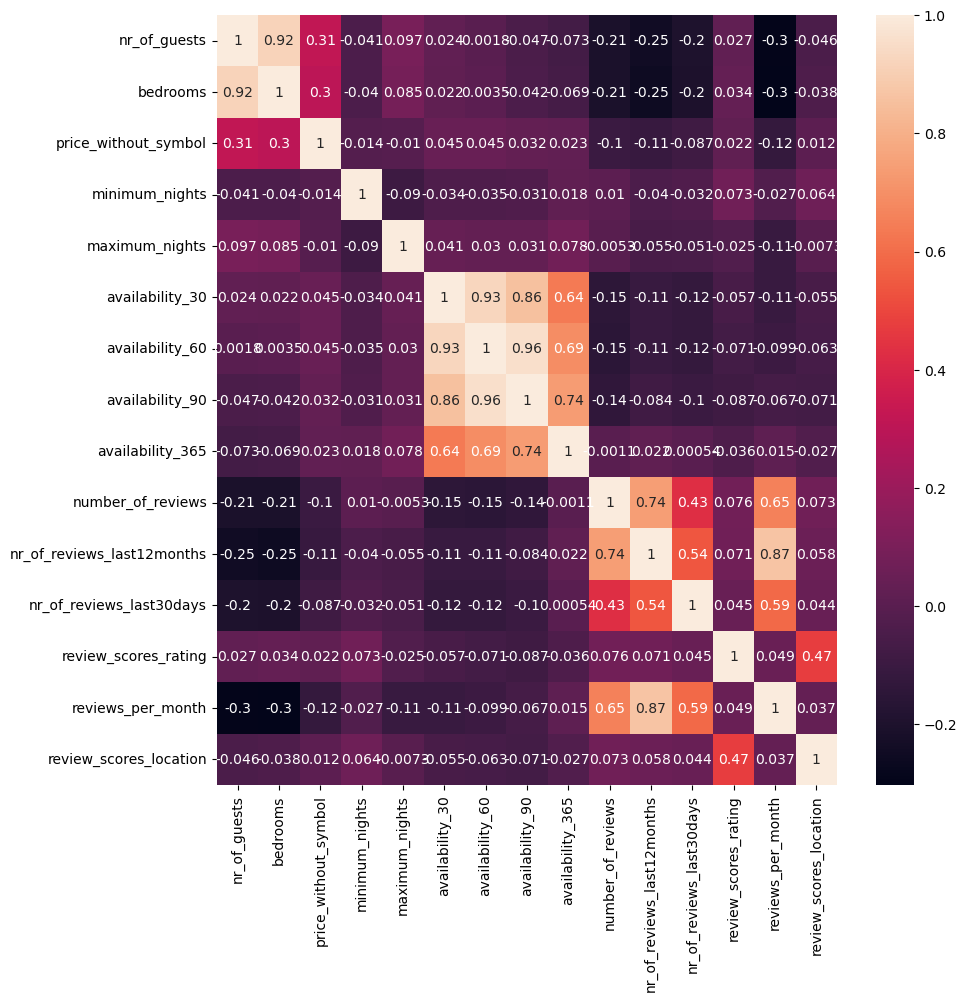

In [20]:
# Creating subplot using matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Creating matrix heatmap using seaborn
corr = sns.heatmap(sub_listings.corr(), annot = True, ax = ax)

##### The questions I have so far that are about numeric values and that can me compared are: 
##### What are the numbers of guests that book Airbnb a lot in Mallorca, Mostly duo’s, big groups, in between the two or more or all sizes?
##### What are the differences in prices and are listings of certain prices mostly booked?
##### Are long rents from minimum a month popular in Mallorca?
##### The highest possible score of reviews is 5. Do reviews with a score lower than 3 have a lot of influence on the popularity of the listing?
##### All values related to these questions are: nr_of_guests, nr_of_reviews, nr_of_reviews_last12months, reviews_per_month, review_scores_rating, price_without_symbol, minimum_nights, review_scores_location, latitude, longitude
##### My tutor proposed analyzing latitude, longitude, location, and review_scores_location, to determine if there’s a correlation between where a property is situated and how guests rate their stay. I think I can not do this in this section of the project as latitude, longitude and review_scores_location are three values. However, I will add review_score_location.

In [21]:
# try another subset for exploring relationships

sub_corr = df_selected[['nr_of_guests', 'price_without_symbol', 'minimum_nights',  
         'number_of_reviews', 'nr_of_reviews_last12months', 'review_scores_rating', 
        'reviews_per_month', 'review_scores_location']]      

In [22]:
sub_corr

,nr_of_guests,price_without_symbol,minimum_nights,number_of_reviews,nr_of_reviews_last12months,review_scores_rating,reviews_per_month,review_scores_location
0,4,190.0,1,18,3,4.56,0.23,4.94
1,10,579.0,6,1,1,5.00,0.09,5.00
2,8,450.0,6,10,4,5.00,0.47,5.00
3,2,52.0,3,2,2,5.00,0.77,5.00
4,3,67.0,30,60,14,4.62,1.21,4.77
...,...,...,...,...,...,...,...,...
11972,2,91.0,3,17,6,4.82,0.77,4.53
11973,5,115.0,1,1,1,5.00,0.35,5.00
11974,6,164.0,1,15,1,4.80,0.44,4.80
11975,4,75.0,7,17,8,4.94,0.35,4.94


In [23]:
# Create a correlation matrix using pandas

sub_corr.corr()

,nr_of_guests,price_without_symbol,minimum_nights,number_of_reviews,nr_of_reviews_last12months,review_scores_rating,reviews_per_month,review_scores_location
nr_of_guests,1.000000,0.314549,-0.041113,-0.208751,-0.245533,0.027190,-0.295547,-0.045845
price_without_symbol,0.314549,1.000000,-0.014002,-0.100739,-0.112776,0.022034,-0.122723,0.012026
minimum_nights,-0.041113,-0.014002,1.000000,0.010195,-0.040048,0.072834,-0.027397,0.063557
number_of_reviews,-0.208751,-0.100739,0.010195,1.000000,0.743780,0.075591,0.654636,0.072761
nr_of_reviews_last12months,-0.245533,-0.112776,-0.040048,0.743780,1.000000,0.070555,0.865602,0.058148
review_scores_rating,0.027190,0.022034,0.072834,0.075591,0.070555,1.000000,0.048578,0.470887
reviews_per_month,-0.295547,-0.122723,-0.027397,0.654636,0.865602,0.048578,1.000000,0.036523
review_scores_location,-0.045845,0.012026,0.063557,0.072761,0.058148,0.470887,0.036523,1.000000


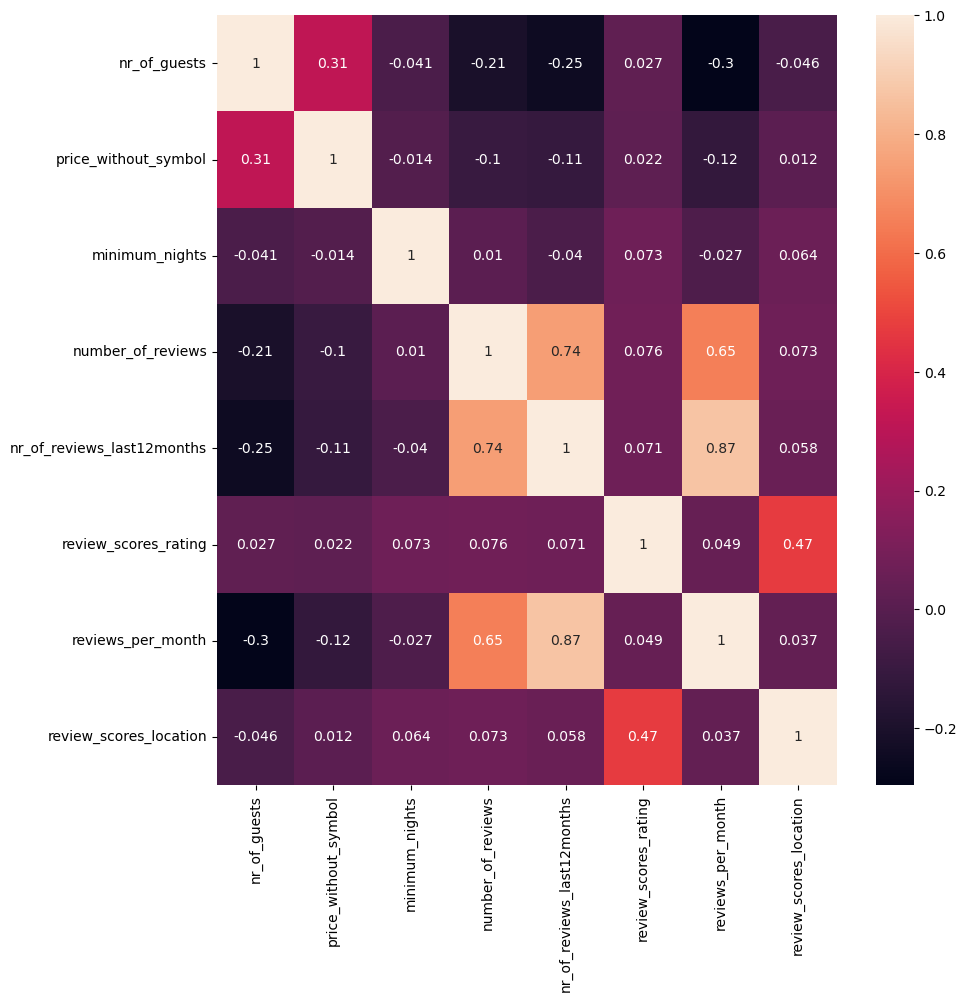

In [24]:
# Creating subplot using matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Creating matrix heatmap using seaborn
corr = sns.heatmap(sub_corr.corr(), annot = True, ax = ax)

##### There is a weak to moderate positive relation between the nr of guests and the price. The higher the nr of guests, the higher the price
##### There is a weak negative relation between the nr of guests and any of the review variables. The higher the nr of guests, the lower the review values
##### The number of review values have a strong positive relation with the reviews per month. Which makes sense as the more reviews, the higher the average of reviews per month
##### The review_scores_rating has a moderate to strong positive relation with review_scores_location. This would indicate that the higher the review rating, the higher the location part of the rating.

#### As there is a stronger positive relation between nr_of_reviews_last12months and reviews_per_month than the nr_of_reviews with the last, I am going to create a last subset where I leave out the number_of_reviews. 

In [25]:
# last subset for this task:

sub_corr2 = df_selected[['nr_of_guests', 'price_without_symbol', 'minimum_nights', 'nr_of_reviews_last12months', 'review_scores_rating', 
        'reviews_per_month', 'review_scores_location']]      

In [26]:
sub_corr2

,nr_of_guests,price_without_symbol,minimum_nights,nr_of_reviews_last12months,review_scores_rating,reviews_per_month,review_scores_location
0,4,190.0,1,3,4.56,0.23,4.94
1,10,579.0,6,1,5.00,0.09,5.00
2,8,450.0,6,4,5.00,0.47,5.00
3,2,52.0,3,2,5.00,0.77,5.00
4,3,67.0,30,14,4.62,1.21,4.77
...,...,...,...,...,...,...,...
11972,2,91.0,3,6,4.82,0.77,4.53
11973,5,115.0,1,1,5.00,0.35,5.00
11974,6,164.0,1,1,4.80,0.44,4.80
11975,4,75.0,7,8,4.94,0.35,4.94


In [27]:
# Create a correlation matrix using pandas

sub_corr2.corr()

,nr_of_guests,price_without_symbol,minimum_nights,nr_of_reviews_last12months,review_scores_rating,reviews_per_month,review_scores_location
nr_of_guests,1.000000,0.314549,-0.041113,-0.245533,0.027190,-0.295547,-0.045845
price_without_symbol,0.314549,1.000000,-0.014002,-0.112776,0.022034,-0.122723,0.012026
minimum_nights,-0.041113,-0.014002,1.000000,-0.040048,0.072834,-0.027397,0.063557
nr_of_reviews_last12months,-0.245533,-0.112776,-0.040048,1.000000,0.070555,0.865602,0.058148
review_scores_rating,0.027190,0.022034,0.072834,0.070555,1.000000,0.048578,0.470887
reviews_per_month,-0.295547,-0.122723,-0.027397,0.865602,0.048578,1.000000,0.036523
review_scores_location,-0.045845,0.012026,0.063557,0.058148,0.470887,0.036523,1.000000


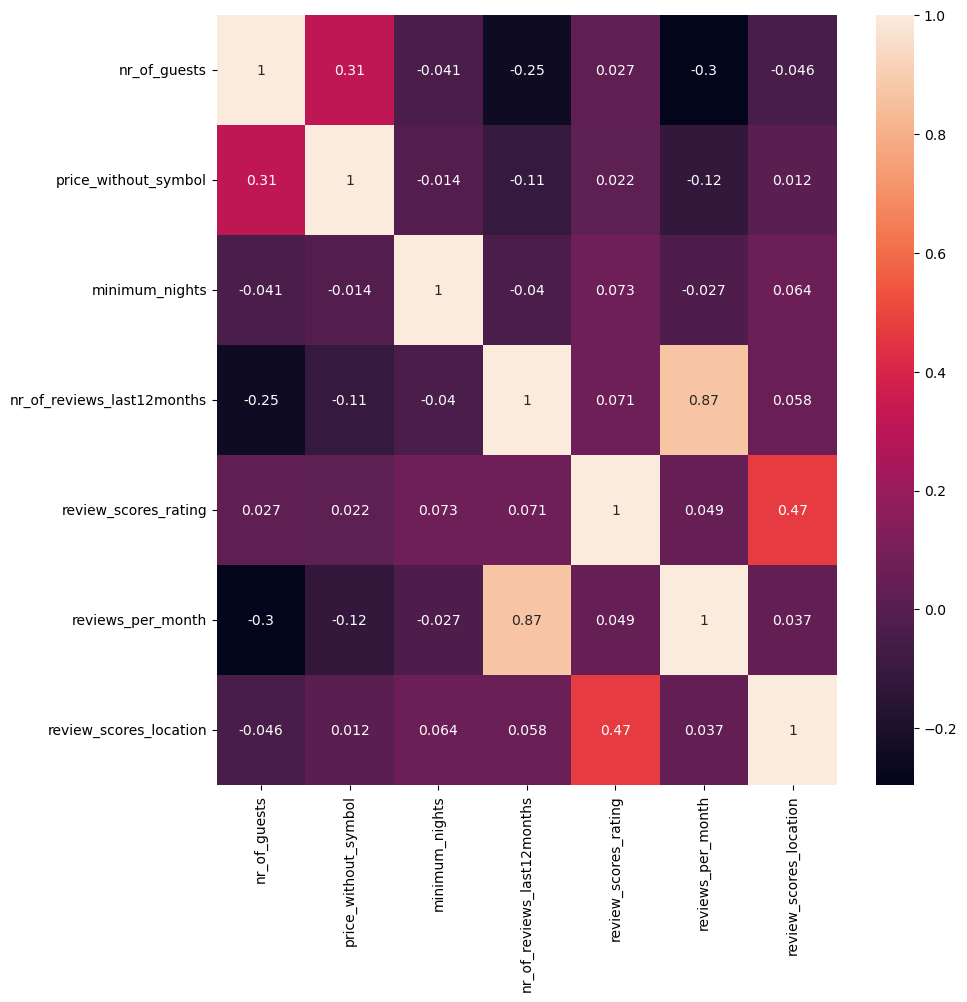

In [28]:
# Creating subplot using matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Creating matrix heatmap using seaborn
corr = sns.heatmap(sub_corr2.corr(), annot = True, ax = ax)
f.savefig(os.path.join(path, '04 Analysis','Visualizations', 'matrixheatmap.png')) # save figure

### Scatterplot(s) of the strongest correlations

C:\Users\svand\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


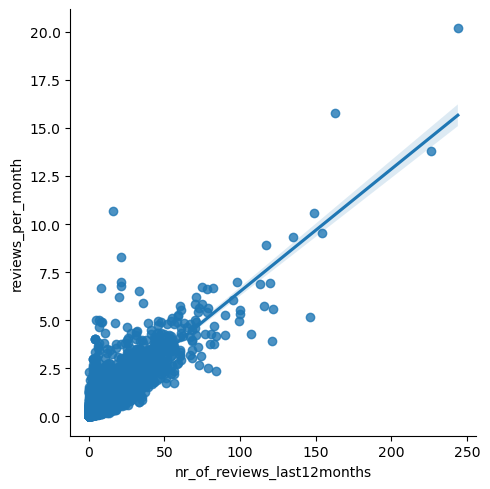

In [29]:
# Scatterplot of most correlated variables
# nr_of_reviews_last12months and reviews_per_month

scplt_reviews = sns.lmplot(x = 'nr_of_reviews_last12months', y = 'reviews_per_month', data = df_selected)
scplt_reviews.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scplot_reviews.png')) # save figure


##### There is a strong correlation between the two variables. You can see clearly there are not many listings with more than 100 reviews in the last 12 months or an average of more than 7.5 reviews per month. There are only a few outliers. 

C:\Users\svand\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


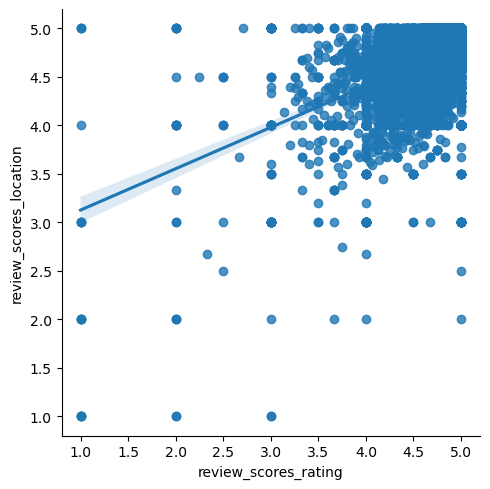

In [30]:
# review_scores_rating and review_scores_location

scplt_review_scores = sns.lmplot(x = 'review_scores_rating', y = 'review_scores_location', data = df_selected)
scplt_review_scores.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scplot_review_scores.png')) # save figure

##### In this scatterplot you can clearly see that guests give high ratings, as 5 is the highest rating value. There is a moderate relationship between review_scores_rating and review_scores_location. A lot of listings score high on location when the overal rating score is high and are close to the regesssion line. However, there are quite some listings that are far from the regression line as well.

### Pair Plot

In [31]:
# hide future warnings

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

C:\Users\svand\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


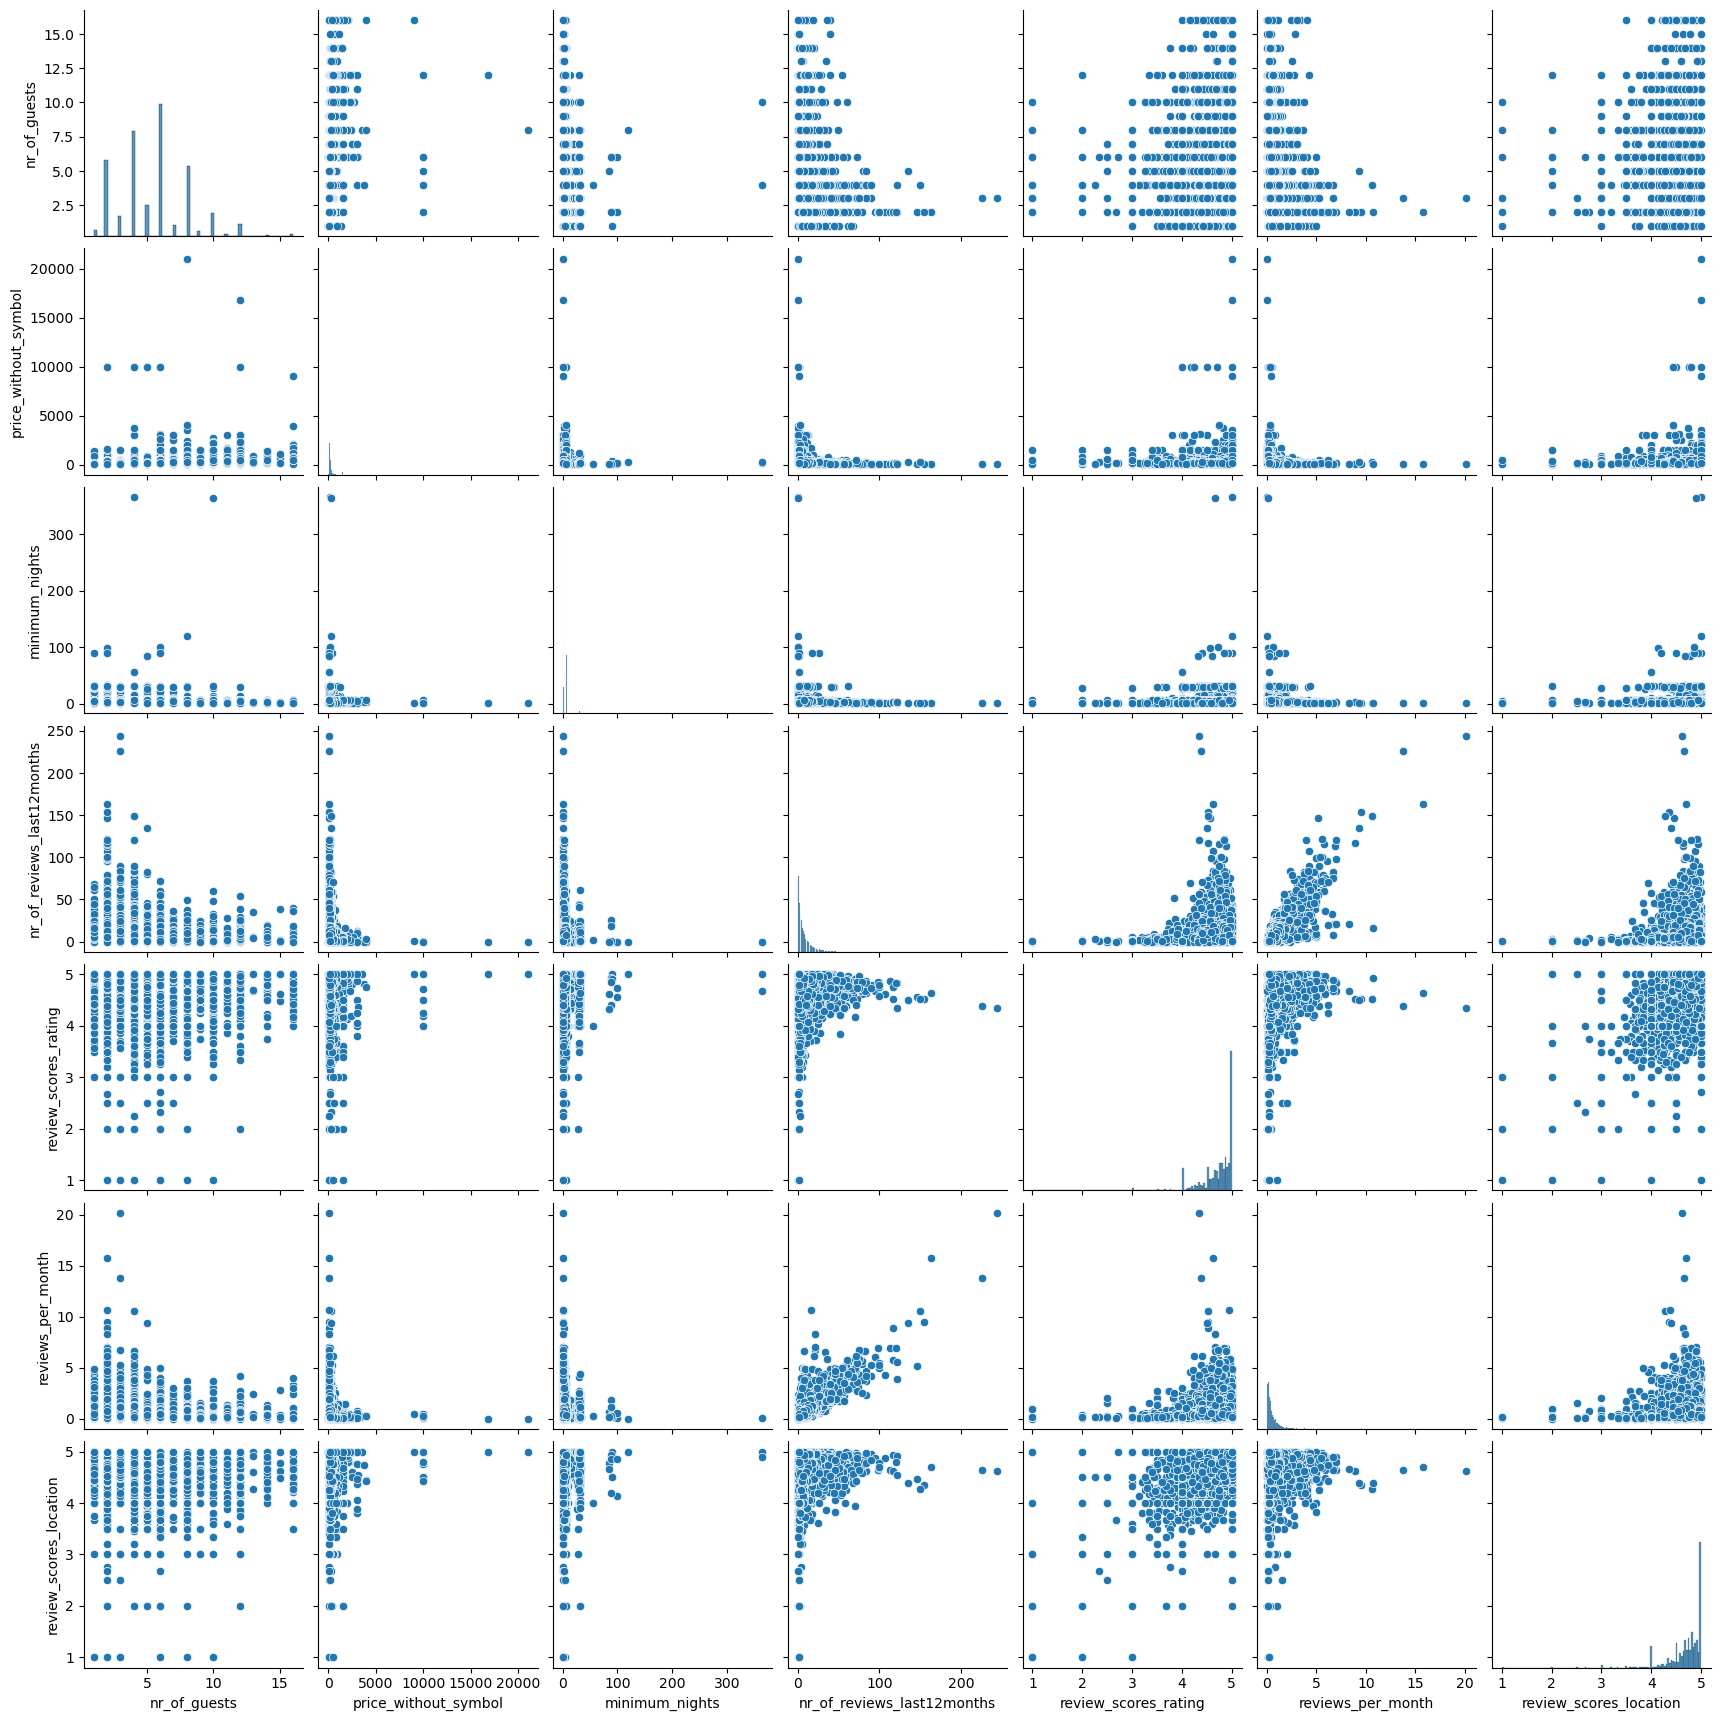

In [32]:
# create a pair plot

pairplot = sns.pairplot(sub_corr2)

In [51]:
# save pair plot

pairplot.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pairplot.png')) # save figure

##### The pairplot shows clearly that the values of a few characteristics have a high impact on the number of listings. There are for example only a few listings with prices per night higher than 9000 dollar. And only a few that require a minimum stay of more than 300 nights. Unfortunately some histograms are less visible because of the extremes in values of the variable. 
##### It also makes sense some scatterplots are dense in a corner as they are correlated to a number of reviews per certain time-period.
##### Looking at the pairplot, I am also interested in further analyse the number of guests in my project and if this has a big influence on other variables.

### Categorical Plot

##### In task 6.1 I stated that I will use the number of reviews and the time-period of the reviews to see which listings are mostly booked
##### After analysing the plots I realize the nr of reviews of the last 12 months can be used to make an estimation on th e nr of bookings. This is why I have decided to use this variable to make a categorical plot. As being a summer destination, the season of Mallorca is normally from April until November. This is 7 months. I will make an estimation that 50% of the quests leave a review. Based on this information I will create the categorical plot.

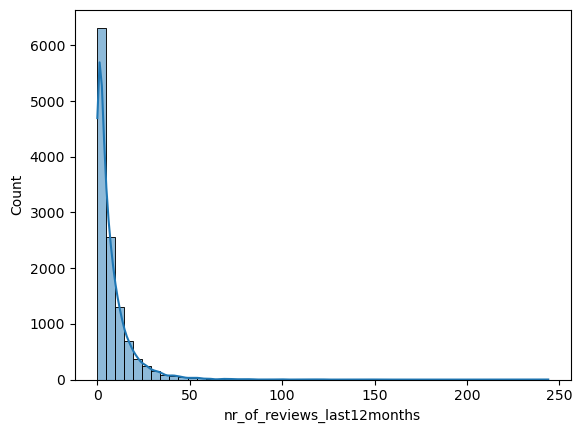

In [33]:
# create histogram to select categories for the nr of review last 12 months:

sns.histplot(df_selected['nr_of_reviews_last12months'], bins = 50, kde = True)
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_reviews_l12m.png'))

In [34]:
# check details nr_of_reviews_last12months

df_selected['nr_of_reviews_last12months'].describe()

count    11977.000000
mean         7.553811
std         10.994714
min          0.000000
25%          1.000000
50%          4.000000
75%         10.000000
max        244.000000
Name: nr_of_reviews_last12months, dtype: float64

In [35]:
# create categories for the number of reviews in the last 12 months. 0 is lowest nr of reviews, 244 is the highest nr of reviews.

df_selected.loc[df_selected['nr_of_reviews_last12months'] <= 3, 'estimation_booking_category'] = 'low in bookings'
df_selected.loc[(df_selected['nr_of_reviews_last12months'] > 3) & (df_selected['nr_of_reviews_last12months'] <= 21), 'estimation_booking_category'] = 'average in bookings'
df_selected.loc[(df_selected['nr_of_reviews_last12months'] > 21) & (df_selected['nr_of_reviews_last12months'] <= 42), 'estimation_booking_category'] = 'high in bookings'
df_selected.loc[df_selected['nr_of_reviews_last12months'] > 42, 'estimation_booking_category'] = 'very high in bookings'

In [36]:
df_selected['estimation_booking_category'].value_counts(dropna = False)

estimation_booking_category
low in bookings          5548
average in bookings      5513
high in bookings          732
very high in bookings     184
Name: count, dtype: int64

In [41]:
df_selected.columns

Index(['id', 'listing_url', 'name', 'picture_url', 'host_since',
       'host_is_superhost', 'location', 'latitude', 'longitude',
       'property_type', 'nr_of_guests', 'bedrooms', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'nr_of_reviews_last12months',
       'nr_of_reviews_last30days', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month', 'price_without_symbol',
       'estimation_booking_category'],
      dtype='object')

In [77]:
df_selected.shape

(11977, 36)

C:\Users\svand\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


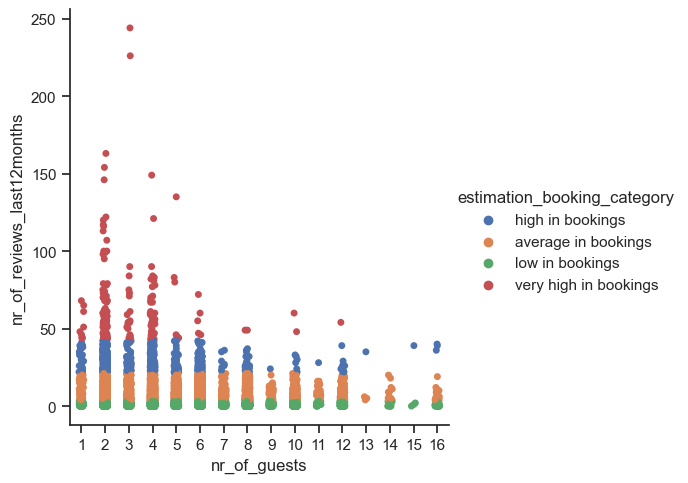

In [37]:
# Create a categorical plot in seaborn using the booking categories created above, combined with nr of guests

sns.set(style="ticks")
g = sns.catplot(x="nr_of_guests", y="nr_of_reviews_last12months", hue="estimation_booking_category", data=df_selected)
g.savefig(os.path.join(path, '04 Analysis','Visualizations', 'catplot_guests_bookings'))

##### the nr_of_guests is the maximum capacity of guests possible at the listing. This categorical plot shows that a variety of nr of guests like to book airbnb's in Mallorca. Individuals and 2-6 quests have most estimated bookings. Bigger groups of 8, 10 and 12 also book Airbnb more often. 

C:\Users\svand\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


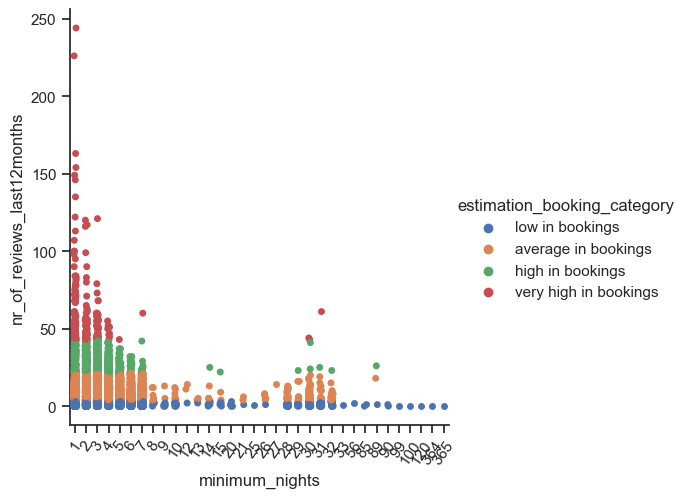

In [39]:
# Create a categorical plot in seaborn using the booking categories created above, combined with minimum nights

sns.set(style="ticks")
g = sns.catplot(x="minimum_nights", y="nr_of_reviews_last12months", hue="estimation_booking_category", data=df_selected)
g.set_xticklabels(rotation=55)
g.savefig(os.path.join(path, '04 Analysis','Visualizations', 'catplot_min_nights_bookings'))

##### The less minmum nights, the more bookings a listing has. After a minimum of 7 nights, I can see that around a minimum stay of 2 weekes and around a month also have more estimated bookings.

C:\Users\svand\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


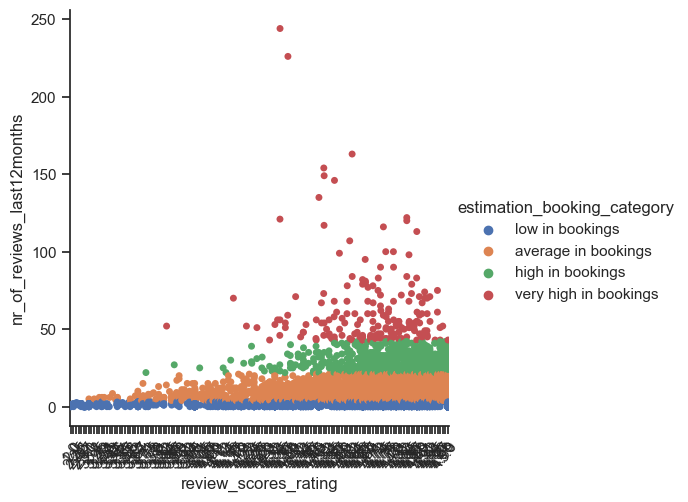

In [40]:
# Create a categorical plot in seaborn using the booking categories created above, combined with review scores rating

sns.set(style="ticks")
g = sns.catplot(x="review_scores_rating", y="nr_of_reviews_last12months", hue="estimation_booking_category", data=df_selected)
g.set_xticklabels(rotation=55)
g.savefig(os.path.join(path, '04 Analysis','Visualizations', 'catplot_review_score_bookings'))

##### I have asked my tutor help for the values on the x asis as it is not clearly visible. From the scatterplot above I can see the rating of 3 is in the middle.  I can tel that the higher the rating of the listing, the more estimated bookings a listing has.

C:\Users\svand\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


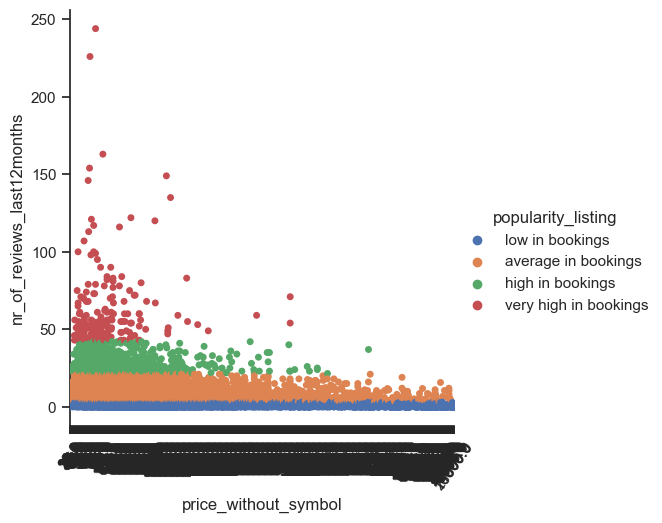

In [100]:
# Create a categorical plot in seaborn using the booking categories created above, combined with price

sns.set(style="ticks")
g = sns.catplot(x="price_without_symbol", y="nr_of_reviews_last12months", hue="estimation_booking_category", data=df_selected)

# Set custom rotation and font size for x-axis labels
g.set_xticklabels(rotation=45, fontsize=9)

# Set custom x-axis tick locations and labels
desired_prices = [5000, 10000, 15000, 20000]  # List of prices you want to display
g.set(xticks=desired_prices, xticklabels=desired_prices)

# Save the plot

g.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'catplot_price_bookings.png'))

plt.show()  # Display the plot

##### Unfortunately the price does not say a lot at this moment. It is a price per night, bus it is depending on what the nr_of_guest are as this makes the price go up. Also the type of property and amenities can have a big influence on the price.This categorical plot does show that the lower the price, the more estimated bookings a listing has

### 4. Answering questions¶

#### What are the numbers of guests that book Airbnb a lot in Mallorca, Mostly duo’s, big groups, in between the two or more or all sizes? 
##### Answer: A variety of nr of guests like to book airbnb's in Mallorca. Individuals and 2-6 quests have most estimated bookings. Bigger groups of 8, 10 and 12 also book Airbnb more often. 

#### What are the differences in prices and are listings of certain prices mostly booked?
##### Answer: There i a huge variety in prices, going from 10 dollars to 21000 dollars per night. The price really depends on the max nr of guests the listing offers and I assume the type of property and several amenities, such as a swimming pool. This I will explore deeper later in the project.
#### Are long stays from minimum a month booked often in Mallorca?
##### Answer: Stays from a month are not booked as often as stays from a week or less, but they have a good amount of estimated bookings. For stays longer than a month only stays of 3 months happen more often. 
#### The highest possible score of reviews is 5. Do reviews with a score lower than 3 have a lot of influence on number of estimated bookings of the listing?
##### Answer: Listings below the rating of 3 are low or average in estimated bookings, with the exception of a few listings that are high of very high in bookings. So the rating does have a lot of influence on the estimated nr of bookings.


### 5. Defining hypotheses

##### Hypothesis 1: If the listing is located at the beach or in the mountains, then the estimated nr of bookings is higher.
##### Hypothesis 2: If the price of a listing is high, then the maximum number of guests is also high.
##### Hypotheis 3: If you are a superhost or a host for a longer time-period, then you have a higher estimated amount of bookings.
##### Hypothesis 4: If listings have extras such as swimming pool, garden or balcony, then their review rating score is higher.  
##### Hypothesis 5: If listings have mountain view or are close to the beach, then the review score location is higher.


In [43]:
#export dataset

df_selected.to_csv(os.path.join(path, '02 Data','Prepared Data', 'listings_checked_explored_updated.csv'))